# Projeto florestas aleatórias

Para este projeto, estaremos explorando dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores).Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra.

Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

# Importar bibliotecas


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obter dados


In [2]:
loans = pd.read_csv('../arquivo/loan_data.csv')

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Análise exploratória de dados 


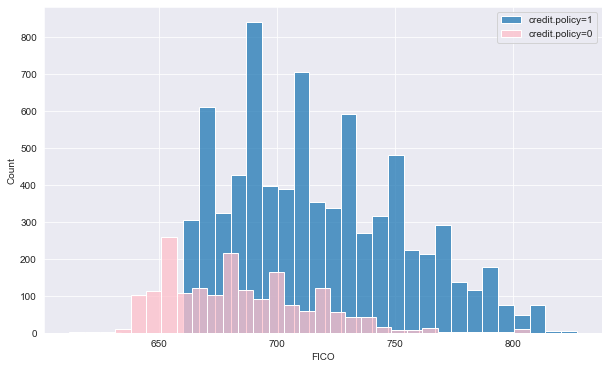

In [97]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
dados_1 = loans[loans['credit.policy']==1]['fico']
dados_2 = loans[loans['credit.policy']==0]['fico']
sns.histplot(x=dados_1, bins=30, label='credit.policy=1')
sns.histplot(x=dados_2, bins=30, color='pink', label='credit.policy=0')
plt.xlabel('FICO')
plt.legend()

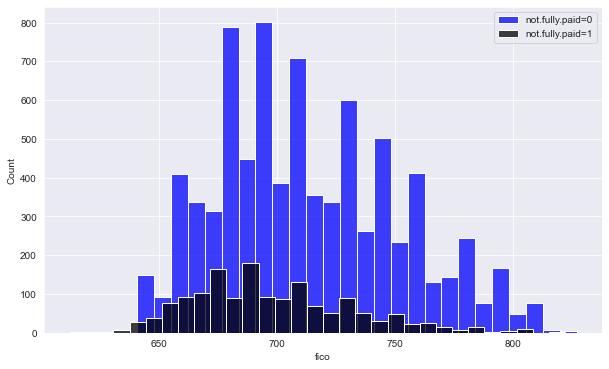

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
dados_1 = loans[loans['not.fully.paid']==1]['fico']
dados_2 = loans[loans['not.fully.paid']==0]['fico']
sns.histplot(x=dados_2, bins=30, color='blue', label='not.fully.paid=0')
sns.histplot(x=dados_1, bins=30, label='not.fully.paid=1', color='black')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

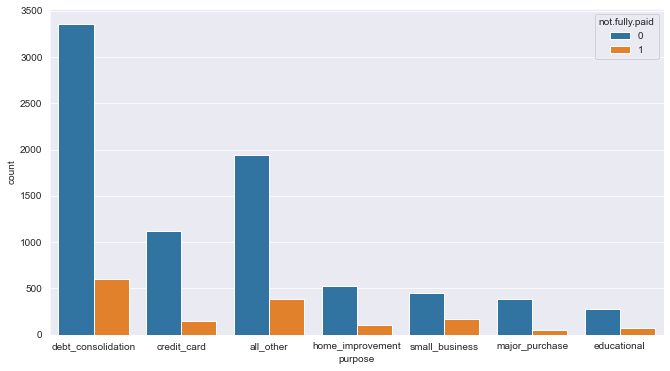

In [59]:
plt.figure(figsize=(11, 6))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid')

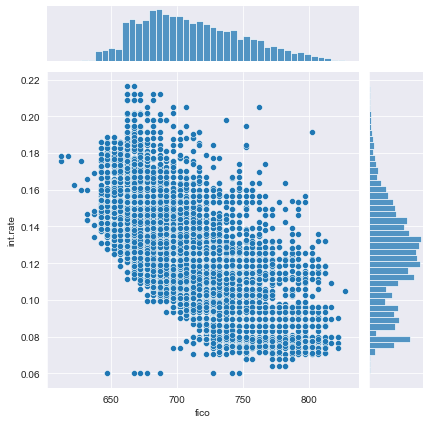

In [60]:
sns.jointplot(x='fico', y='int.rate', data=loans)

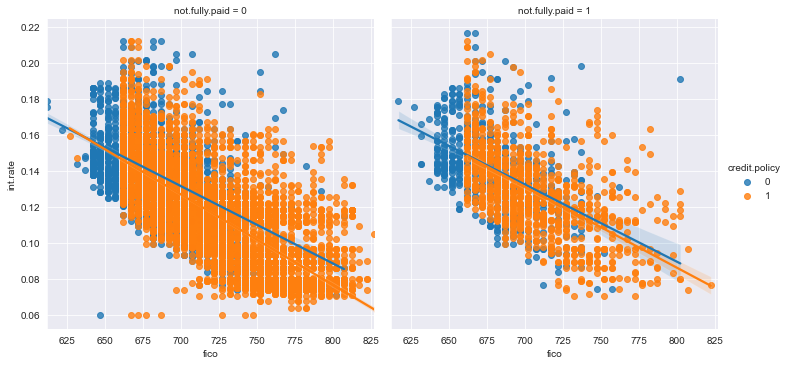

In [74]:
sns.lmplot(x='fico', y='int.rate',data=loans, hue='credit.policy', col='not.fully.paid')

# Configurando os dados


In [75]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Recursos categóricos


In [76]:
cat_feats = ['purpose']

In [77]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [98]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Divisão Treino-Teste de dados


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('credit.policy', axis=1), final_data['credit.policy'], test_size=0.3)

## Training a Decision Tree Model


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier()

In [84]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Previsões e avaliação da árvore de decisão


In [85]:
pred = dtree.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.99      1.00      1.00      2308

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874


[[ 554   12]
 [  11 2297]]


## Treinando o modelo de florestas aleatórias


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
florest = RandomForestClassifier()

In [92]:
florest.fit(X_train, y_train)

RandomForestClassifier()

## Previsões e Avaliação


In [93]:
florest_pred = florest.predict(X_test)

In [96]:
print(classification_report(y_test, florest_pred))
print()
print(confusion_matrix(y_test, florest_pred))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       566
           1       0.99      1.00      0.99      2308

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874


[[ 539   27]
 [   5 2303]]
